In [ ]:
import numpy as np

class Perceptron:
  def __init__(self, eta=.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
      # X.shape = [n_examples, n_features]
      # y.shape = [n_examples]
      # returns = self : object
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=.0, scale=.01,
                            size=X.shape[1])
      self.b_ = np.float_(0.)
      self.errors_ = []

      for _ in range(self.n_iter):
        errors = 0
        for xi, target in zip(X, y):
          update = self.eta * (target - self.predict(xi))
          self.w_ += update * xi
          self.b_ += update
          errors += int(update != .0)
        self.errors_.append(errors)
      return self

  def net_input(self, X):
      return np.dot(X, self.w_) + self.b_

  def predict(self, X):
      return np.where(self.net_input(X) >= .0, 1, 0)

In [ ]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding="utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


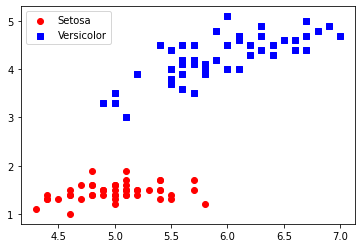

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1],
            color="blue", marker="s", label="Versicolor")
plt.legend(loc="upper left")
plt.show()

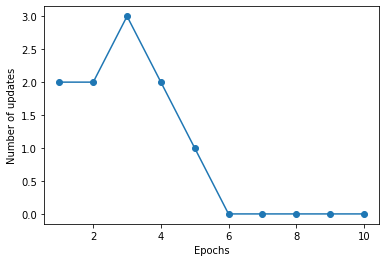

In [ ]:
ppn = Perceptron(eta=.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1),
         ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=.02):
  markers = ("o", "s", "^", "v", "<")
  colors = ("red", "blue", "ligthgreen", "gray", "cyan")
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl , 0],
                y=X[y == cl, 1],
                alpha = .8,
                c = colors[idx],
                marker = markers[idx],
                label = f"Class {cl}",
                edgecolor = "black")

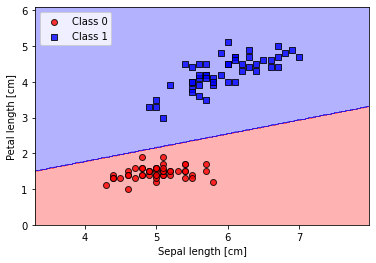

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

In [ ]:
class AdalineGD:
  def __init__(self, eta=.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=.0, scale=.01,
                          size=X.shape[1])
    self.b_ = np.float(.0)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= .5, 1, 0)

<ipython-input-14-fd916541f861>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(.0)


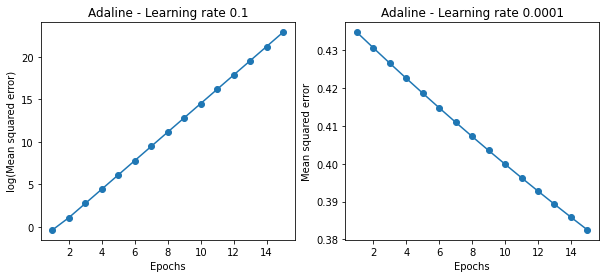

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_)+1),
           np.log10(ada1.losses_), marker="o")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [ ]:
ada_gd = AdalineGD(n_iter=20, eta=.5)
ada_gd.fit(X_std, y)

<ipython-input-14-fd916541f861>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(.0)


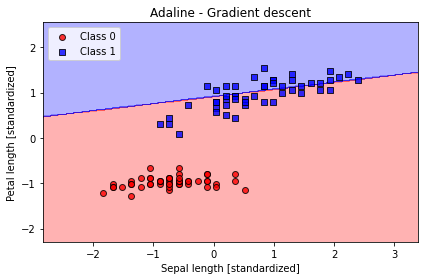

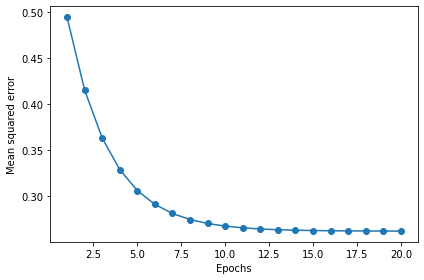

In [ ]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),
ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In [ ]:
class AdalineSGD:
  def __init__(self, eta=0.01, n_iter=10,
   shuffle=True, random_state=None):

   self.eta = eta
   self.n_iter = n_iter
   self.w_initialized = False
   self.shuffle = shuffle
   self.random_state = random_state

  def fit(self, X, y):
    self._initialize_weights(X.shape[1])
    self.losses_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
        losses.append(self._update_weights(xi, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  def partial_fit(self, X, y):
    if not self.w_initialized:
      self.w_initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    """Shuffle training data"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self, m):
    """Initialize weights to small random numbers"""
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                               size=m)
    self.b_ = np.float_(0.)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """Apply Adaline learning rule to update the weights"""
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_ += self.eta * 2.0 * xi * (error)
    self.b_ += self.eta * 2.0 * error
    loss = error**2
    return loss

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
    """Compute linear activation"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X))
                    >= 0.5, 1, 0)

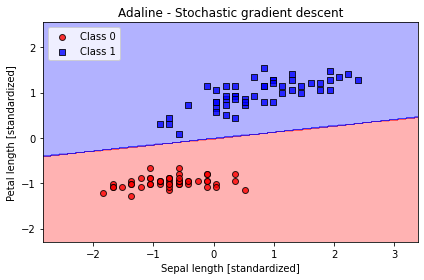

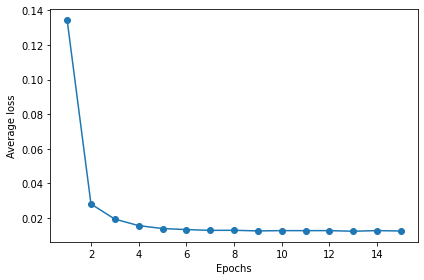

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_,
marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()